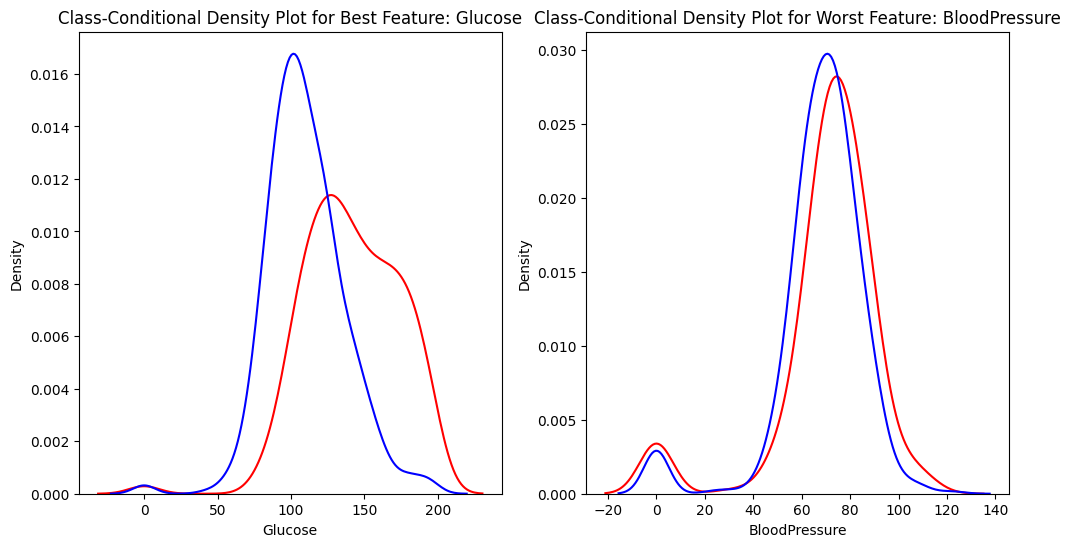

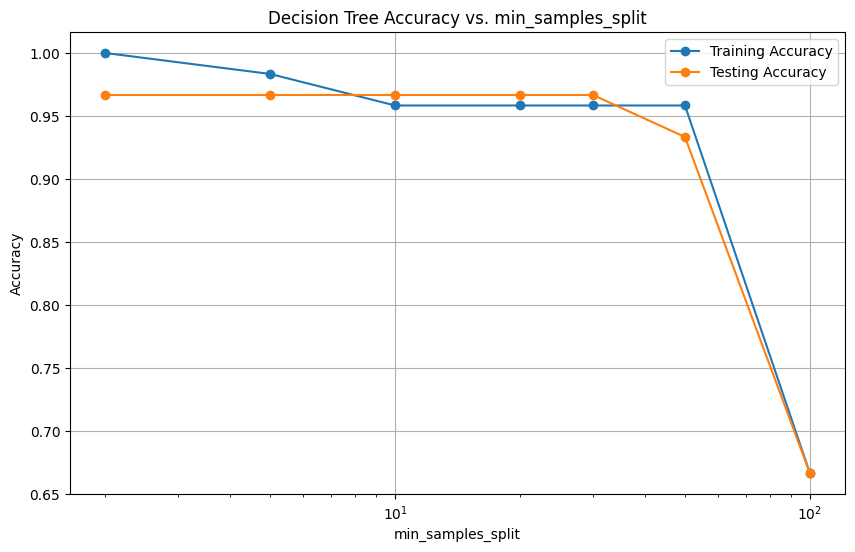

In [8]:
from sklearn.feature_selection import f_classif
import arff, pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, mutual_info_classif
from sklearn.metrics import accuracy_score

def main():

    with open("diabetes.arff", "r") as file:

        dataset = arff.load(file)
        attribute_names = [attr[0] for attr in dataset['attributes']]
        data_dict = {attr: [] for attr in attribute_names}

        for row in dataset['data']:
            for i, value in enumerate(row):
                data_dict[attribute_names[i]].append(value)

        df = pd.DataFrame(data_dict)

        # 1
        X, y = df.drop('Outcome', axis=1), df['Outcome']
        
        f_values, p_values = f_classif(X, y)

        feature_scores = pd.DataFrame({
            'Feature': X.columns,
            'F-Value': f_values,
            'p-Value': p_values
        })

        feature_scores = feature_scores.sort_values(by='F-Value', ascending=False)
        best_feature = feature_scores.iloc[0]['Feature']
        worst_feature = feature_scores.iloc[-1]['Feature']

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.kdeplot(df[best_feature][df['Outcome'] == '1'], label='Diabetes', color='r')
        sns.kdeplot(df[best_feature][df['Outcome'] == '0'], label='Normal', color='b')
        plt.title(f'Class-Conditional Density Plot for Best Feature: {best_feature}')
        plt.xlabel(best_feature)
        plt.ylabel('Probability Density')
        plt.subplot(1, 2, 2)
        sns.kdeplot(df[worst_feature][df['Outcome'] == '1'], label='Diabetes', color='r')
        sns.kdeplot(df[worst_feature][df['Outcome'] == '0'], label='Normal', color='b')
        plt.title(f'Class-Conditional Density Plot for Worst Feature: {worst_feature}')
        plt.xlabel(worst_feature)
        plt.savefig('output.png')

        # 2
        n_runs, random_state = 10, 1
        train_accuracies, test_accuracies = [], []

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=random_state)
        predictor = tree.DecisionTreeClassifier()

        feature_scores = mutual_info_classif(X_train, y_train)
        sorted_features = np.argsort(feature_scores)

        for m in [2, 5, 10, 20, 30, 50, 100]:
            train_m_acc, test_m_acc = [], []

            top_features = sorted_features[-m:]
            X_m_train, X_m_test = X_train.iloc[:, top_features], X_test.iloc[:, top_features]

            predictor.fit(X_m_train, y_train)
            train_accuracies.append(metrics.accuracy_score(y_train, predictor.predict(X_m_train)))
            test_accuracies.append(metrics.accuracy_score(y_test, predictor.predict(X_m_test)))
        
        print("Train accuracies: ", train_accuracies, "\nTest accuracies: ", test_accuracies)












main()

def main2():

    # Load dataset (replace with your own dataset)
    data = load_iris()
    X, y = data.data, data.target

    # Parameters for the task
    min_samples_split_values = [2, 5, 10, 20, 30, 50, 100]
    n_runs = 10  # Number of runs for averaging
    random_state = 1  # Fixed seed for reproducibility

    # Initialize lists to hold the average accuracies
    train_accuracies, test_accuracies = [], []
    test_accuracies = []

    # Stratified split for each min_samples_split value
    for min_samples_split in min_samples_split_values:
        train_acc = []
        test_acc = []
        
        for _ in range(n_runs):
            # Stratified 80-20 split
            sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=random_state)
            train_idx, test_idx = next(sss.split(X, y))
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            # Train a decision tree classifier with the current min_samples_split
            clf = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=random_state)
            clf.fit(X_train, y_train)

            # Predict and calculate accuracy for training and testing sets
            train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
            test_acc.append(accuracy_score(y_test, clf.predict(X_test)))

        # Average the accuracies over the runs
        train_accuracies.append(np.mean(train_acc))
        test_accuracies.append(np.mean(test_acc))

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(min_samples_split_values, train_accuracies, label='Training Accuracy', marker='o')
    plt.plot(min_samples_split_values, test_accuracies, label='Testing Accuracy', marker='o')
    plt.xscale('log')
    plt.xlabel('min_samples_split')
    plt.ylabel('Accuracy')
    plt.title('Decision Tree Accuracy vs. min_samples_split')
    plt.legend()
    plt.grid(True)
    plt.savefig('output2.png')




    return

main2()